![](https://i.imgur.com/BAhJSSl.jpg)

# Flight Price Prediction

## Jaya Raghavendra | jay.raghav333@gmail.com | 7036563656

![](https://i.imgur.com/N566cjv.jpg)

### Description
- Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### 01 - Problem Statement
- To predict the price of flight ticket based on the available travel tickets data

### 02 - Business Understanding

- By creating the model to predict the prices of flight ticket price, companies have several benifits. Such as:
    - Companies can avoid manual errors of flight prices.
    - Provides an insight for the new travelling companies about the ticket price.
    - Companies can decide the margin they can offer to the customer.
    - Companies could draw insights of Day to Day price variation.

### 03 - Data Exploration

In [1]:
#importing required libraries
import warnings # To avoid deprecation erros in notebook
warnings.filterwarnings('ignore')
import re #For handling regular expressions
import numpy as np #for handling multi dimensional arrays of data
import pandas as pd #for handling structured data
import matplotlib.pyplot as plt # for 2D plotting
import seaborn as sns # for better visualizations
from math import sqrt # for square root of values
#to plot all graphs in the notebook
%matplotlib inline

In [2]:
# Loading data and storing the data in a variable for future modifications
df = pd.read_excel('Data_Train.xlsx')

In [3]:
# The top 5 rows of data.
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Features of our Data

| Feature Name | Description |
| ------- | ------- |
| Airline | The name of the airline |
| Date_of_Journey | The date of the journey|
| Source |The source from which the service begins|
| Destination| The destination where the service ends|
| Route| The route taken by the flight to reach the destination|
| Dep_Time| The time when the journey starts from the source|
| Arrival_Time| Time of arrival at the destination|
| Duration| Total duration of the flight|
| Total_Stops|Total stops between the source and destination|
| Additional_Info| Additional information about the flight|
| Price| The price of the ticket|

In [4]:
#Let's check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#Let's Check the Statistical Information of our data
df.describe(include=['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


### Insights from Uncleaned Data
- There are 10683 Journey Details available in our dataset
- On 18th May 2019 highest no of passengers travelled
- Delhi is the Major Source point for our travellers

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Insights from Uncleaned Data
- Priciest Ticket price is Rs.79,512
- Cheapest TIcket is Rs.1759
- Average Price of our Ticket is Rs. 9087

In [7]:
# Maximum Ticket Details
df[df.Price == df.Price.max()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


In [8]:
# Cheapest Ticket Cost
df[df.Price == df.Price.min()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759
4274,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759
10513,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759


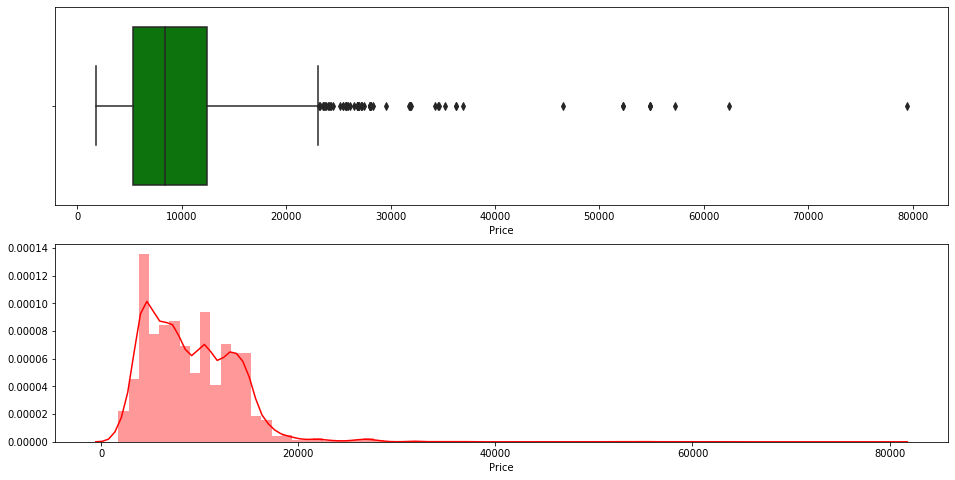

In [9]:
# Dristribution of Ticket Price
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df.Price, color='g', saturation=0.8)
plt.subplot(2,1,2)
sns.distplot(df.Price, bins=75, color='r')

In [10]:
# Missing Data
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

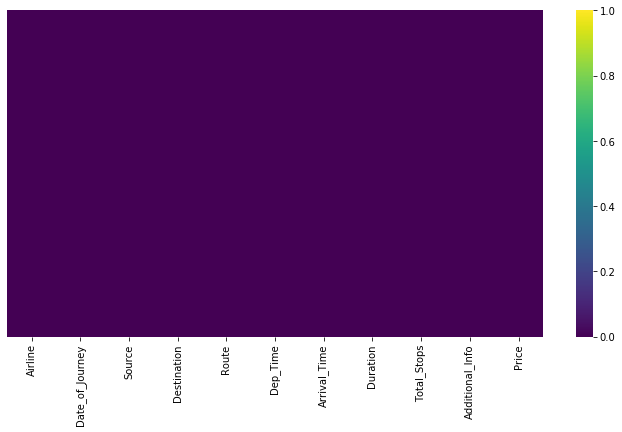

In [11]:
# One of the best Visual Representation of Null Values available in our data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

- Here we go, We have found 2 Missing positions of data. We will check & replace the data.

In [12]:
df[df.Route.isnull() == True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [13]:
df[df.Total_Stops.isnull() == True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [14]:
# Let's Drop the row where the Null values are present
df.dropna(axis=0, inplace=True)

### 04 - Data Cleaning

In [15]:
# Let's CHeck the COlumns of our Data
cols = df.columns
cols

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
# Uniqe Values Available in our data
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

- There are 12 Unique Airlines
- 44 Different Daates of our Journey
- 5 Different Sources and 6 Unique Destinations

#### a) AirLines

In [17]:
# Let's Check each feature in a detail way
# We have completely cleaned data with us
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [18]:
# Lets check thier values available
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

- We can see that last four types of airlines are very less in number, Let's club them as others.
- Change the names of the least numer of available AirLines to Others using pyhton Map function

In [19]:
# Creating a simple definition to change the names to Others
def name_change(x):
    if x == 'Multiple carriers Premium economy':
        return 'Others'
    elif x == 'Jet Airways Business':
        return 'Others'
    elif x == 'Vistara Premium economy':
        return 'Others'
    elif x == 'Trujet':
        return 'Others'
    else:
        return x

In [20]:
# We can change using pandas df.apply(lambda x: f(x)) function
df.Airline =df.Airline.apply(lambda x: name_change(x))

#### Visualizing AirLines Data

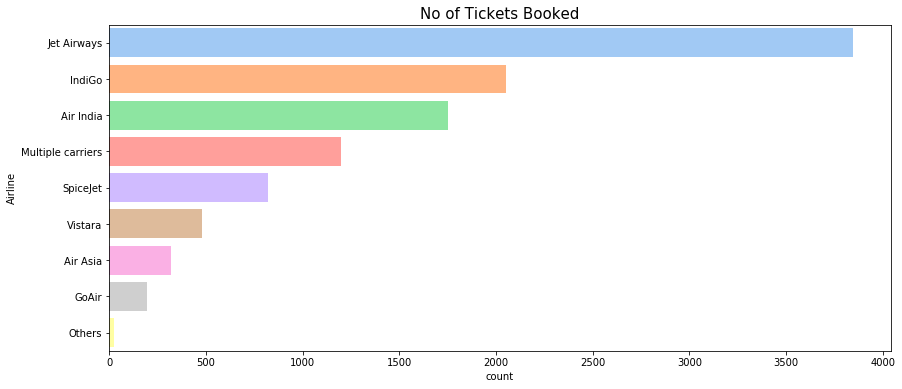

In [21]:
# Countplot
plt.figure(figsize=(14,6))
plt.title('No of Tickets Booked', size=15)
sns.set_palette('pastel')
sns.countplot(y = df.Airline, order=df.Airline.value_counts().index, saturation=3)

- Jet Airways tops the list & GoAir is in the bottom of the race.

#### b) Date of Journey

In [22]:
# Lets check the data type of our feature
df.Date_of_Journey[:5]

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [23]:
# We have to convert the column data to DateTime stamp dtype
from datetime import datetime
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)

- date.weekday()
    - Return the day of the week as an integer, where Monday is 0 and Sunday is 6. For example, date(2002, 12, 4).weekday() == 2

In [24]:
# Let's Grab Month, Year and Day Data from the TimeStamps and add them to our data frame

weekDay_Name = {0 : "Monday",1 : "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6:"Sunday"}

Month_Name = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

df['Year'] = df.Date_of_Journey.apply(lambda x: x.year)
df['Month'] = df.Date_of_Journey.apply(lambda x: x.month)
df['Month'] = df['Month'].map(Month_Name)

df['Day'] = df.Date_of_Journey.apply(lambda x: x.day)
df['Day'] = df.Date_of_Journey.apply(lambda x: x.weekday())
df['Day'] = df['Day'].map(weekDay_Name)

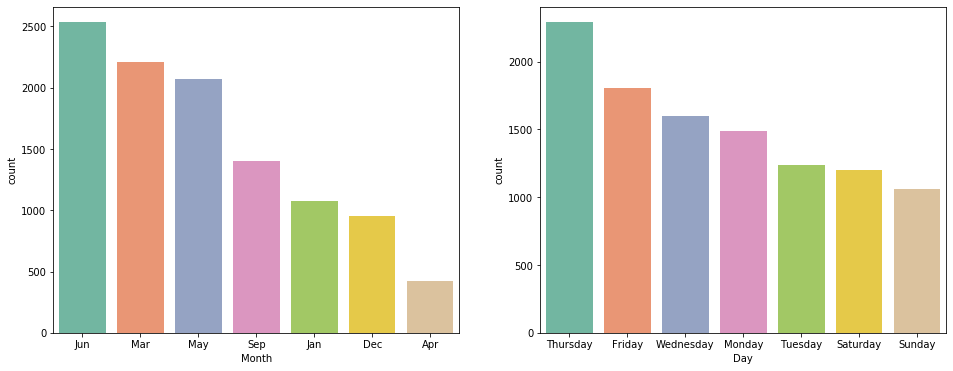

In [25]:
plt.figure(figsize=(16,6))
sns.set_palette('Set2')

plt.subplot(121)
sns.countplot(df.Month, order=df.Month.value_counts().index)

plt.subplot(122)
sns.countplot(df.Day, order=df.Day.value_counts().index)

#### Insights from Travelling Periods
- Most of the people travelled on June, March and May that conclude some cases similar to College Joining, Vacation Trips etc.,
- On Thursday more number of people were travelling when compared with Weekends - Friday, Saturday and Saturday.

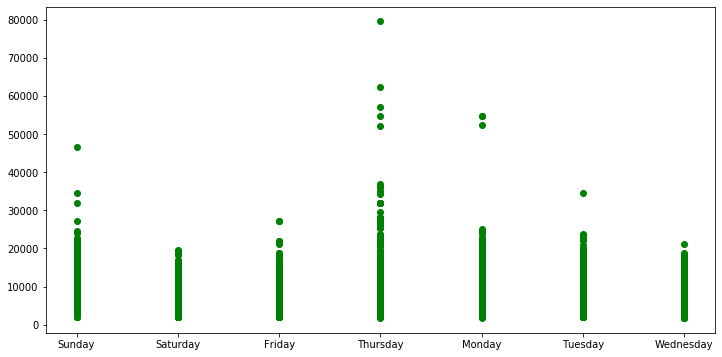

In [26]:
# Let's check the price variation on the week days
plt.figure(figsize=(12,6))
plt.scatter(df.Day, df.Price, color='g')

#### c) Source & Destination

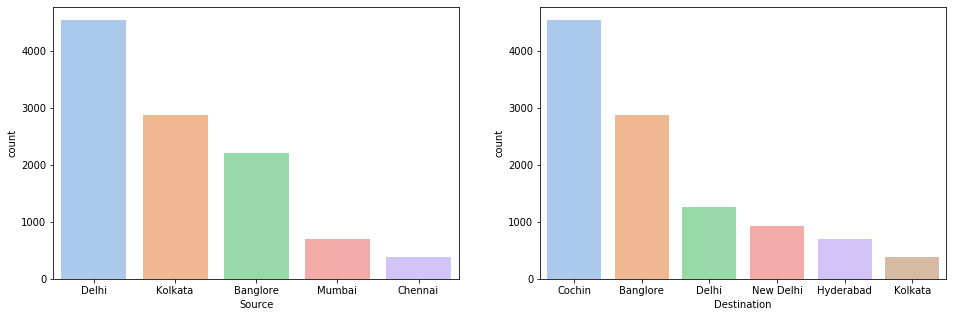

In [27]:
plt.figure(figsize=(16,5))
sns.set_palette('pastel')

plt.subplot(121)
sns.countplot(df.Source, order=df.Source.value_counts().index)

plt.subplot(122)
sns.countplot(df.Destination, order=df.Destination.value_counts().index)

- Delhi tops the list in Flights Source & Cochin tops in destination
- Chennai stands last in Source & Kolkata stands last in flight destination

#### d) Route

In [28]:
# Statistics of Route Data
df.Route.describe()

count               10682
unique                128
top       DEL → BOM → COK
freq                 2376
Name: Route, dtype: object

In [29]:
# Lets check the top 10 Routes of Flights
df.Route.value_counts()[:10]

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
Name: Route, dtype: int64

- More number of people travelled from Delhi to Cochin
- Bangalore to Delhi Route stands 2nd in the List

#### e) Departure & Arrival Times

In [30]:
df.keys()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Year', 'Month', 'Day'],
      dtype='object')

In [31]:
df.Dep_Time[:5]

0    22:20
1    05:50
2    09:25
3    18:05
4    16:50
Name: Dep_Time, dtype: object

In [32]:
# Let's convert the data type to Time.

df.Dep_Time = df.Dep_Time.apply(lambda x: int(datetime.strptime(re.search(r'\d{2}:\d{2}', x)[0], '%H:%M').time().hour))

df.Arrival_Time = df.Arrival_Time.apply(lambda x: int(datetime.strptime(re.search(r'\d{2}:\d{2}', x)[0], '%H:%M').time().hour))

In [33]:
# Let's gain the insights from the data
#######################################
# 00:00 - 04:00 ------> Early Morning
# 04:00 - 12:00 ------> Morning
# 12:00 - 16:00 ------> Afternoon
# 16:00 - 22:00 ------> Night
# 22:00 - 23:00 ------> Mid Night
######################################
def Day_Period(x):
    if 0 <= x <= 4:
        return 'Early Morning'
    elif 22 < x <= 23:
        return 'Mid Night'
    elif 4 < x < 12:
        return 'Morning'
    elif 12 <= x <= 16:
        return 'Afternoon'
    elif 16 < x <= 22:
        return 'Night'

In [34]:
df.Dep_Time = df.Dep_Time.apply(lambda x: Day_Period(x))

df.Arrival_Time = df.Arrival_Time.apply(lambda x: Day_Period(x))

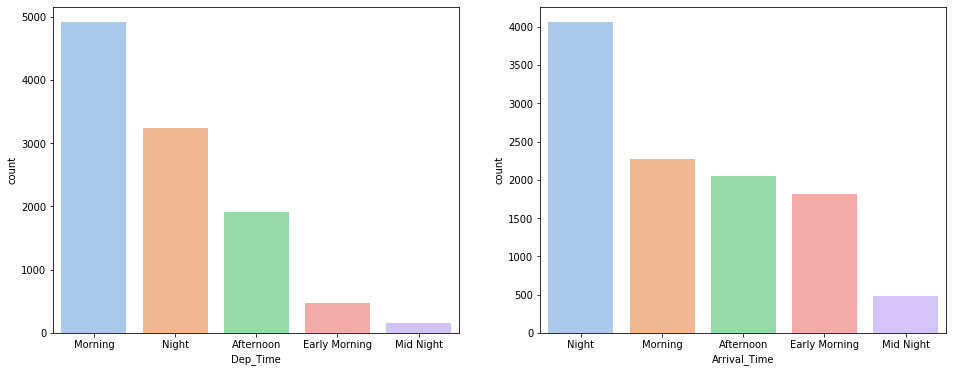

In [35]:
plt.figure(figsize=(16,6))

plt.subplot(121)
sns.countplot(df.Dep_Time, order=df.Dep_Time.value_counts().index)

plt.subplot(122)
sns.countplot(df.Arrival_Time, order=df.Arrival_Time.value_counts().index)

- From the above plots we can conclude
    - Most of the people has Early Morning Travel as thier first priority & Night Travel as thier second priority
    - Most of the people reach their destination point in Night Time and Afternoon stands second.

- The above could be useful for Ca Transportation companies such as Uber, Ola & Govt Bus facility.
    - Early Morning demand will be higher in the local places such as internal city locations.
    - Night Time demand for cabs stands high.
    - Cab Drivers could go to Airport in night times so that they can get rides very easily.

#### f) Duration

In [36]:
df.Duration[:5]

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [37]:
df.Duration.value_counts().tail(10)

29h 30m    1
29h 10m    1
42h 5m     1
42h 45m    1
31h 50m    1
40h 20m    1
30h 15m    1
29h 40m    1
32h 20m    1
4h 10m     1
Name: Duration, dtype: int64

In [38]:
# We can see that ther is a value with '5m' in our data, Let's Dig into it
df[df.Duration == '5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day
6474,Air India,2019-06-03,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,Afternoon,Afternoon,5m,2 stops,No info,17327,2019,Jun,Monday


In [39]:
# It pretty seems to be fake, Let's drop the data with 5 minutes
df = df[df.Duration != '5m']

In [40]:
# Let's convert the Duration to Minutes
def Dur2Min(x):
    try:
        return int(x.split(" ")[0].split('h')[0])*60 + int(x.split(" ")[1].split('m')[0])
    except:
        return int(x.split('h')[0])*60

In [41]:
df.Duration = df.Duration.apply(lambda x: Dur2Min(x))

##############################
Mean :  643.080235932965
Median :  520.0
##############################


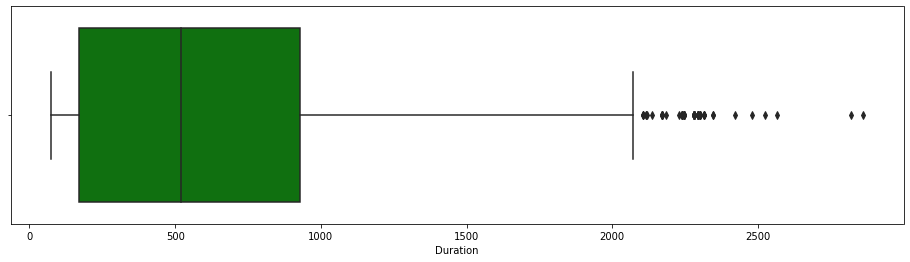

In [42]:
plt.figure(figsize=(16,4))
sns.boxplot(df.Duration, color='g')

print("#"*30)
print("Mean : ", df.Duration.mean())
print("Median : ", df.Duration.median())
print("#"*30)

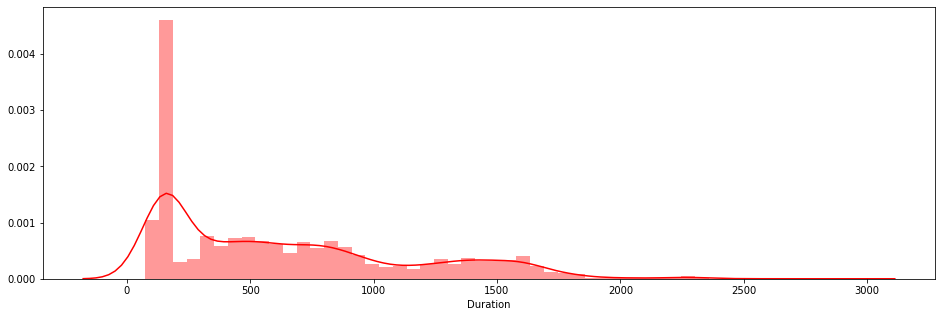

In [43]:
plt.figure(figsize=(16,5))
sns.distplot(df.Duration,bins=50, color='r')

#### g) Total_Stops

In [44]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [45]:
# Drop the value with 4 stops for our better modelling as it is only in 1 Instance
df[df.Total_Stops == '4 stops']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day
9182,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,Morning,Morning,1770,4 stops,Change airports,17686,2019,Jan,Thursday


In [46]:
df = df[df.Total_Stops != '4 stops']

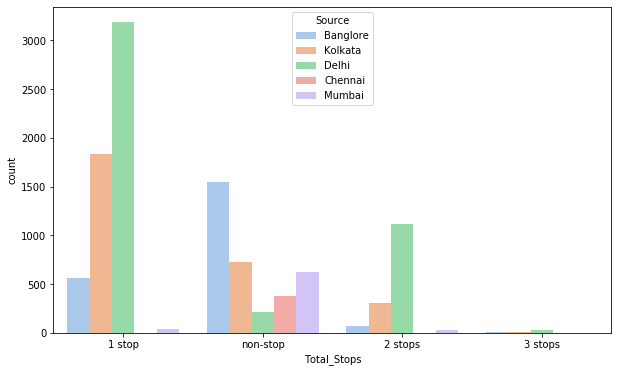

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(df.Total_Stops, order=df.Total_Stops.value_counts().index, hue=df.Source)

#### j) Other Info

In [48]:
# Let's check the unique values of Additional Info
df.Additional_Info.value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    6
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [49]:
# There are two No info, let's change the both values

#we can use replace for solving this issue
replacement = {'Additional_Info': {'No Info': 'No info'}}
df.replace(replacement, regex = True, inplace = True)

In [50]:
df.Additional_Info.value_counts()

No info                         8346
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    6
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

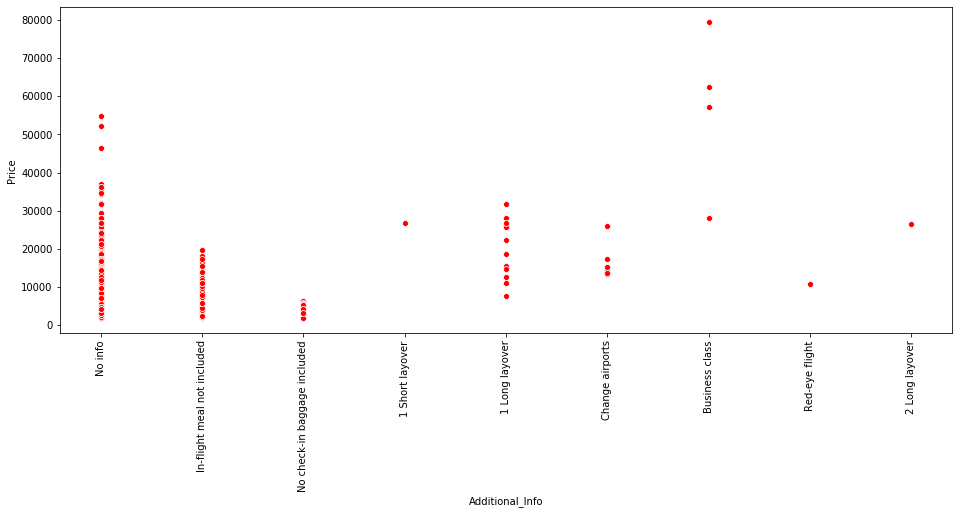

In [51]:
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
sns.scatterplot(df.Additional_Info, df.Price, color = 'r')

- We can see that Business Class Tops the list in Price category.
- Most of the flights ticket data doesnt have additional info

#### k) Price - Target Value

##############################
Mean :  9085.637921348314
Median :  8372.0
##############################


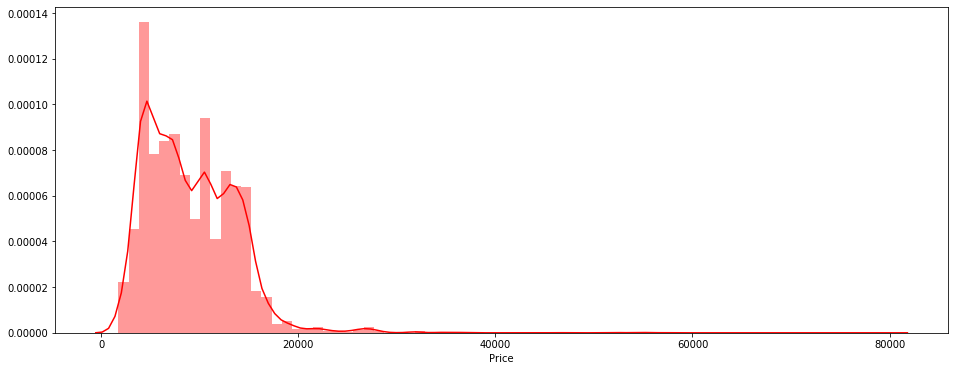

In [52]:
plt.figure(figsize=(16,6))
sns.distplot(df.Price, color='r', bins=75)

print("#"*30)
print("Mean : ", df.Price.mean())
print("Median : ", df.Price.median())
print("#"*30)

In [53]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,Night,Early Morning,170,non-stop,No info,3897,2019,Mar,Sunday
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2 stops,No info,7662,2019,Jan,Saturday
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Early Morning,1140,2 stops,No info,13882,2019,Sep,Friday
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,Night,Mid Night,325,1 stop,No info,6218,2019,Dec,Thursday
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,Afternoon,Night,285,1 stop,No info,13302,2019,Jan,Thursday


In [54]:
df = df[['Airline', 'Date_of_Journey', 'Year', 'Month', 'Day', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price']]

In [55]:
df.head()

,Airline,Date_of_Journey,Year,Month,Day,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,2019,Mar,Sunday,Banglore,New Delhi,BLR → DEL,Night,Early Morning,170,non-stop,No info,3897
1,Air India,2019-01-05,2019,Jan,Saturday,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2 stops,No info,7662
2,Jet Airways,2019-09-06,2019,Sep,Friday,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Early Morning,1140,2 stops,No info,13882
3,IndiGo,2019-12-05,2019,Dec,Thursday,Kolkata,Banglore,CCU → NAG → BLR,Night,Mid Night,325,1 stop,No info,6218
4,IndiGo,2019-01-03,2019,Jan,Thursday,Banglore,New Delhi,BLR → NAG → DEL,Afternoon,Night,285,1 stop,No info,13302


### 04 - Pre-processing Data

In [56]:
#import required libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [57]:
# Let's drop the the columns which aren't required for model building
df.drop(labels=['Date_of_Journey', 'Route',  'Year'], axis=1, inplace=True)
# Column Year has only one value 2019, Thats the reason its dropped.

In [58]:
# Look at our data
df.head()

,Airline,Month,Day,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Mar,Sunday,Banglore,New Delhi,Night,Early Morning,170,non-stop,No info,3897
1,Air India,Jan,Saturday,Kolkata,Banglore,Morning,Afternoon,445,2 stops,No info,7662
2,Jet Airways,Sep,Friday,Delhi,Cochin,Morning,Early Morning,1140,2 stops,No info,13882
3,IndiGo,Dec,Thursday,Kolkata,Banglore,Night,Mid Night,325,1 stop,No info,6218
4,IndiGo,Jan,Thursday,Banglore,New Delhi,Afternoon,Night,285,1 stop,No info,13302


In [59]:
df.describe(include=['O'])

,Airline,Month,Day,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info
count,10680,10680,10680,10680,10680,10680,10680,10680,10680
unique,9,7,7,5,6,5,5,4,9
top,Jet Airways,Jun,Thursday,Delhi,Cochin,Morning,Night,1 stop,No info
freq,3849,2534,2289,4536,4536,4910,4058,5625,8346


#### Let's encode the data olumns with object datatype for Model Training

In [60]:
df.head()

,Airline,Month,Day,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Mar,Sunday,Banglore,New Delhi,Night,Early Morning,170,non-stop,No info,3897
1,Air India,Jan,Saturday,Kolkata,Banglore,Morning,Afternoon,445,2 stops,No info,7662
2,Jet Airways,Sep,Friday,Delhi,Cochin,Morning,Early Morning,1140,2 stops,No info,13882
3,IndiGo,Dec,Thursday,Kolkata,Banglore,Night,Mid Night,325,1 stop,No info,6218
4,IndiGo,Jan,Thursday,Banglore,New Delhi,Afternoon,Night,285,1 stop,No info,13302


In [61]:
df = pd.get_dummies(df)

In [62]:
df.head()

,Duration,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,...,Total_Stops_non-stop,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170,3897,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,445,7662,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1140,13882,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,325,6218,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,285,13302,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
df.columns

Index(['Duration', 'Price', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_Others', 'Airline_SpiceJet',
       'Airline_Vistara', 'Month_Apr', 'Month_Dec', 'Month_Jan', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Sep', 'Day_Friday', 'Day_Monday',
       'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday',
       'Day_Wednesday', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Dep_Time_Afternoon',
       'Dep_Time_Early Morning', 'Dep_Time_Mid Night', 'Dep_Time_Morning',
       'Dep_Time_Night', 'Arrival_Time_Afternoon',
       'Arrival_Time_Early Morning', 'Arrival_Time_Mid Night',
       'Arrival_Time_Morning', 'Arrival_Time_Night', 'Total_Stops_1 stop',
       'Total

In [65]:
# Let us save the Excel file for future use.
#df.to_excel('Data_for_Model_Training_Dummies.xlsx', index=None)

## 05 - Model Training

In [66]:
# Let's define valiables and Targets
X = df.drop(labels=['Price'], axis=1)
y = df['Price']

In [67]:
scaler = StandardScaler()

In [68]:
X.head()

,Duration,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,...,Total_Stops_non-stop,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,445,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1140,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,325,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,285,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [69]:
X = scaler.fit_transform(X)

In [70]:
# Split the data into training and testing data for validation against Hyper parameters.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [71]:
# Create a function to print Metrics of our data, similar to classification report
# import required Sci-Kit Learn metrics for compiling

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, accuracy_score

def model_report(y_true, y_pred):
    print('R2 Score : ', r2_score(y_true, y_pred))
    print("Root Mean Squared Error : ", sqrt(mean_squared_error(y_true, y_pred)))

#### Linear Regession

In [73]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

model_report(y_test, y_pred)

R2 Score :  -6.013191532265323e+25
Root Mean Squared Error :  3.4342281277746704e+16


#### KNN Regression

In [81]:
params = dict(n_neighbors = list(range(1, 20)))

knn_model = GridSearchCV(KNeighborsRegressor(), param_grid = params, cv = 5, scoring = 'neg_mean_squared_error')

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

model_report(y_test, y_pred)

R2 Score :  0.7280194840640712
Root Mean Squared Error :  2342.6949846715315


#### Decision Tree Regressor

In [74]:
params = dict(max_depth = list(range(1,30)))

tree_model = GridSearchCV(DecisionTreeRegressor(), param_grid = params, cv = 5)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

model_report(y_test, y_pred)

R2 Score :  0.7553173065967848
Root Mean Squared Error :  2190.676495440063


#### Random Forest Regressor

In [75]:
param_distributions = dict(n_estimators = [100,200,300,400,500], min_samples_split = [2,5,10])

randomModel = RandomizedSearchCV(RandomForestRegressor(), param_distributions, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1)

randomModel.fit(X_train, y_train)

y_pred = randomModel.predict(X_test)

model_report(y_test, y_pred)

R2 Score :  0.8468632724051385
Root Mean Squared Error :  1733.0707939854667


#### XGB Regressor

In [76]:
warnings.filterwarnings('ignore')
tuned_params = {'max_depth': [1, 2, 3, 4, 5],
                'n_estimators': [100, 200, 300, 400, 500],
                'reg_lambda': [0.001, 0.1, 1.0]
               }
XGB_model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)

XGB_model.fit(X_train, y_train)

y_pred = XGB_model.predict(X_test)

print(model_report(y_test, y_pred))

[12:19:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score :  0.8410586529607543
Root Mean Squared Error :  1765.6111673100077
None


### Thank You